In [ ]:
import random
import keras
from keras.models import Sequential
from keras.optimizers import Adam
import random
import tensorflow as tf
import string 
import re
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)
import numpy as np

import matplotlib.pyplot as plt

from keras.layers import Conv2D, LeakyReLU, Flatten, Dropout, Dense, Reshape, Conv2DTranspose

3. Завдання щодо генерації або стилізації зображень (на вибір)
Вирішіть завдання перенесення стилю або генерації зображень (архітектура за вашим вибором: GAN/DCGAN/VAE).
Датасети: можна брати CIFAR-100, Fashion MNIST або тут: https://www.kaggle.com/tags/image-data
Приклади: 
https://github.com/natsakh/Data-Analysis/tree/main/Pr_9
https://keras.io/examples/generative/neural_style_transfer/

In [25]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
print("train data shapes: ", X_train.shape, y_train.shape)
print("test data shapes: ", X_test.shape, y_test.shape)

train data shapes:  (60000, 28, 28) (60000,)
test data shapes:  (10000, 28, 28) (10000,)


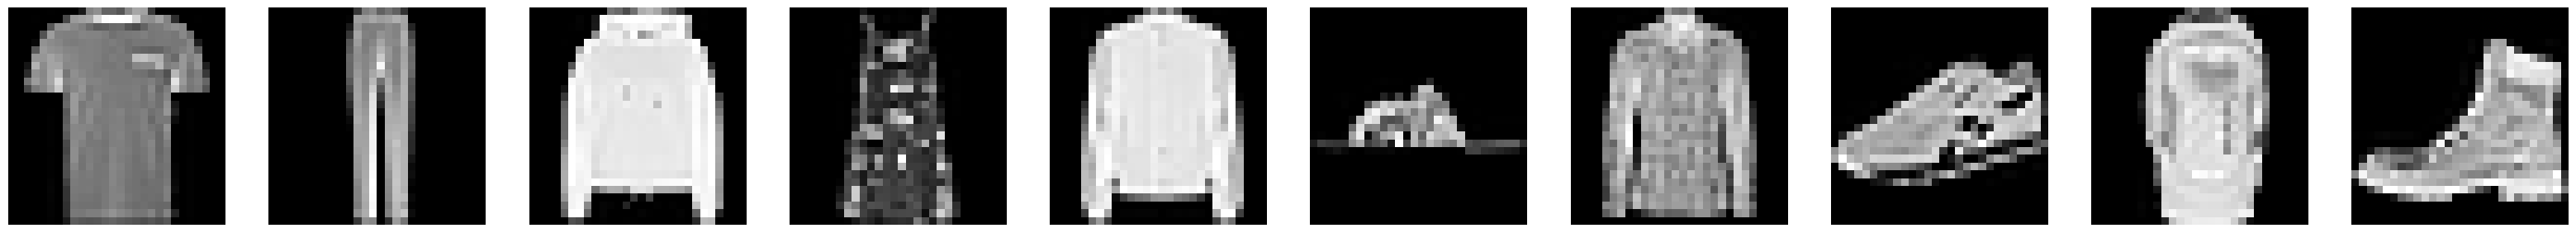

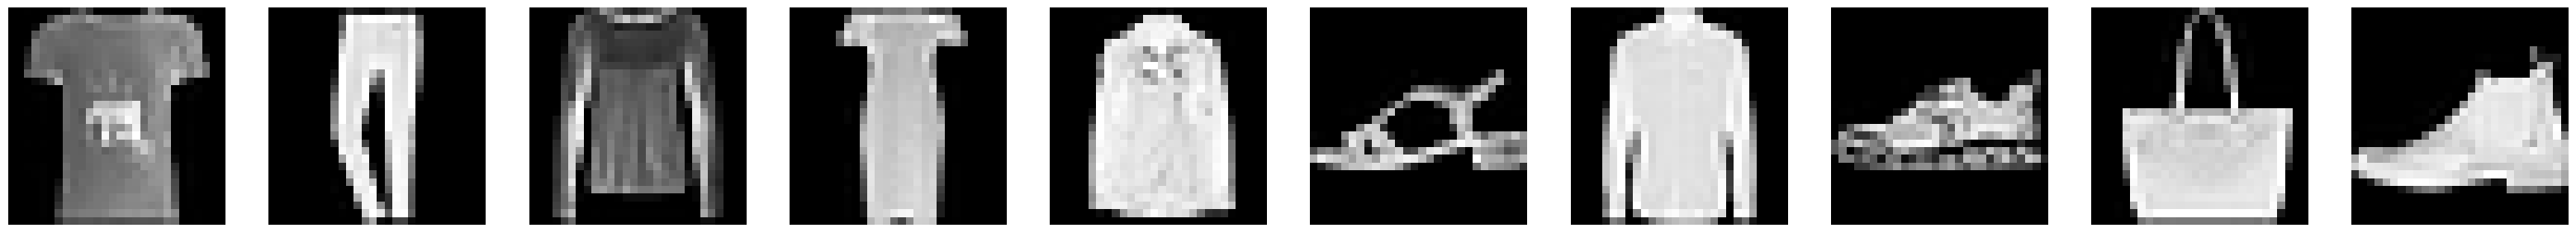

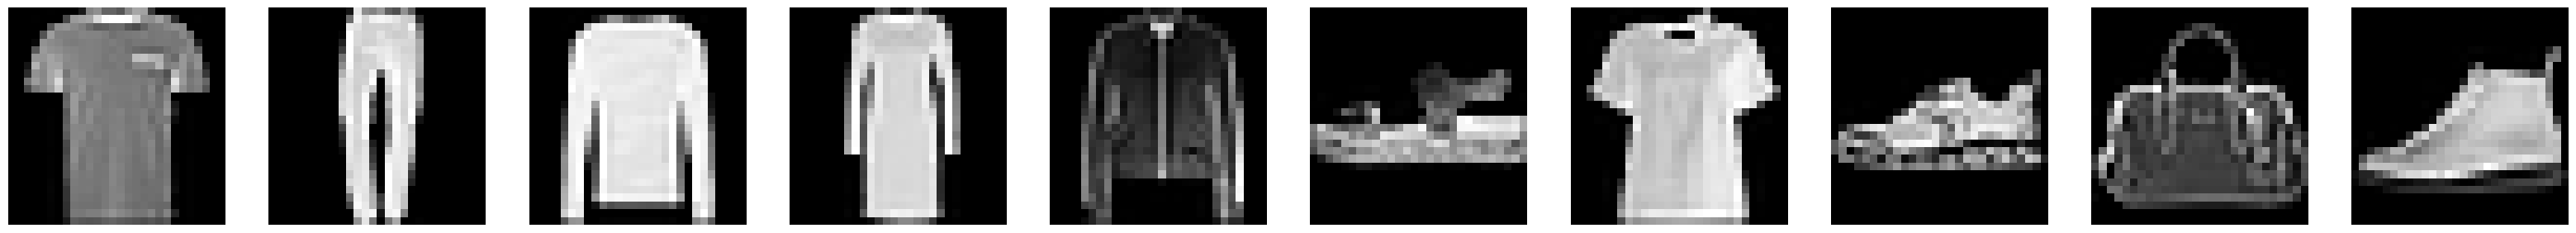

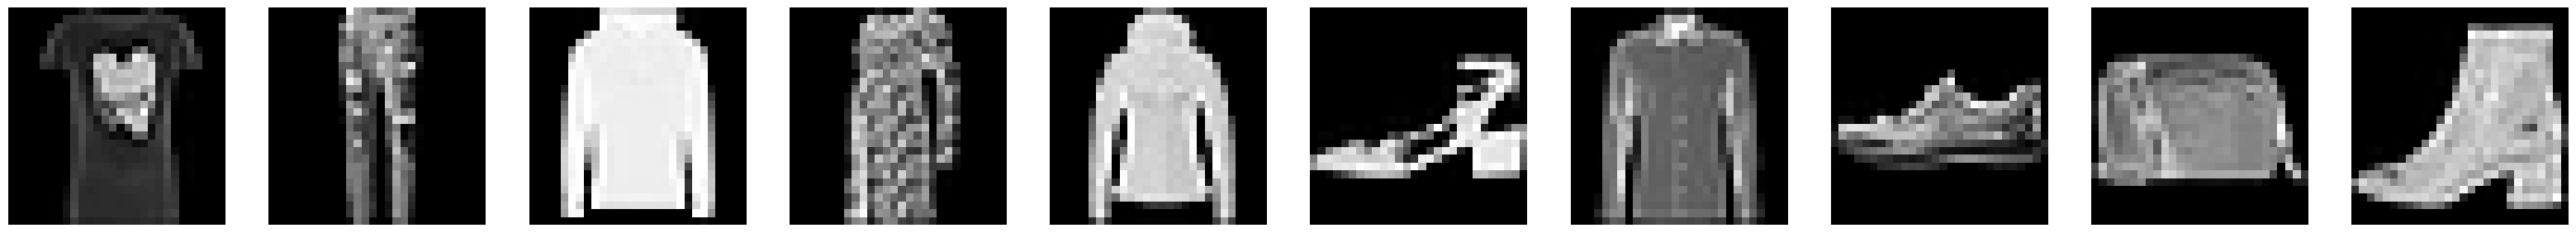

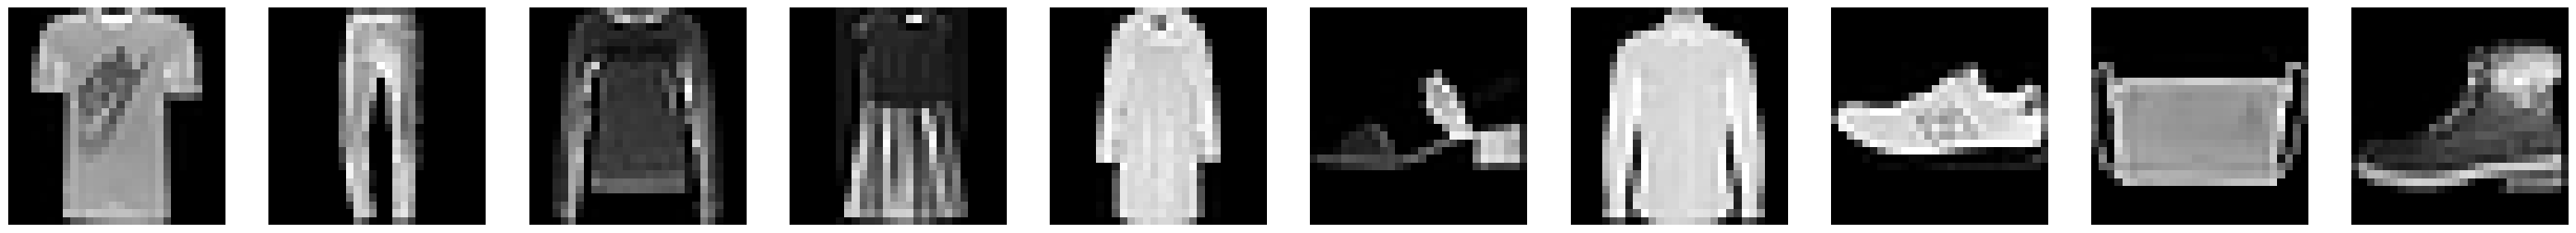

In [26]:
data_rows_to_show = 5


for j in range(data_rows_to_show):
    plt.figure(figsize = (40, 20))
    for y in range(10):
        plt.subplot(1, 10, y + 1)
        pos = np.where(y_train == y)[0][j+random.randint(1,100)]
        plt.imshow(X_train[pos])
        plt.gray()
        plt.axis('off')
    plt.show()

In [8]:
X_train = (X_train.astype('float32') - 127.5) / 127.5
X_test = (X_test.astype('float32') - 127.5) / 127.5

In [9]:
def define_discriminator(in_shape=(28,28,1)):
 model = Sequential()

 model.add(Conv2D(64, (3,3), padding='same', input_shape=in_shape))
 model.add(LeakyReLU(alpha=0.2))

 model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
 model.add(LeakyReLU(alpha=0.2))

 model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
 model.add(LeakyReLU(alpha=0.2))

 model.add(Conv2D(256, (3,3), strides=(2,2), padding='same'))
 model.add(LeakyReLU(alpha=0.2))

 model.add(Flatten())
 model.add(Dropout(0.4))
 model.add(Dense(1, activation='sigmoid'))

 opt = Adam(learning_rate=0.0002, beta_1=0.5)
 model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
 return model

In [10]:
discriminator = define_discriminator()
discriminator.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         147584    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 7, 7, 128)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 256)         

In [11]:
def define_generator(latent_dim):
    model = Sequential()
    n_nodes = 256 * 7 * 7
    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((7, 7, 256)))
    #  7x7
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # 14x14
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # # 28x28

    model.add(Conv2D(1, (1,1), activation='tanh', padding='same'))
    return model

In [12]:
latent_dim = 100
generator = define_generator(latent_dim)
generator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 12544)             1266944   
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 12544)             0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 14, 14, 128)       524416    
 anspose)                                                        
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 28, 28, 128)       262272    
 Transpose)                                           

In [13]:
def generate_latent_points(latent_dim, n_samples):
    x_input = np.random.randn(latent_dim * n_samples)

    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

def generate_fake_samples(g_model, latent_dim, n_samples):
    x_input = generate_latent_points(latent_dim, n_samples)
    X = g_model.predict(x_input)
    y = np.zeros((n_samples, 1))
    return X, y

def generate_real_samples(dataset, n_samples):
    indeces = np.random.randint(0, dataset.shape[0], n_samples)
    X = dataset[indeces]
    y = np.ones((n_samples, 1))
    return X, y

In [15]:
def plot_some_images():
    X, _ = generate_fake_samples(generator, latent_dim, 20)
    X = (X + 1) / 2
    plt.figure(figsize = (40, 20))
    for i in range(10):
        plt.subplot(1, 10, i + 1)
        plt.imshow(X[i])
        plt.gray()
        plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 216ms/step


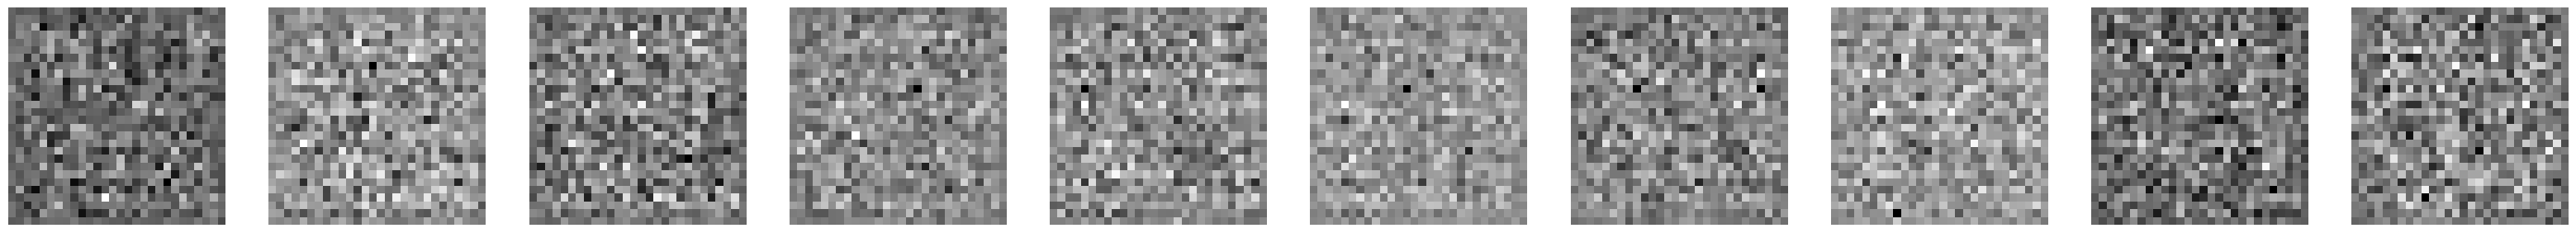

In [16]:
plot_some_images()

In [17]:
def define_gan(g_model, d_model):
    d_model.trainable = False
    model = Sequential()
    model.add(g_model)
    model.add(d_model)
    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model

In [18]:
gan = define_gan(generator, discriminator)
gan.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 28, 28, 1)         2053761   
                                                                 
 sequential (Sequential)     (None, 1)                 521345    
                                                                 
Total params: 2575106 (9.82 MB)
Trainable params: 2053761 (7.83 MB)
Non-trainable params: 521345 (1.99 MB)
_________________________________________________________________


In [19]:
d_losses = [[],[]]

In [20]:
def train_gan_model(g_model, d_model, gan_model, dataset, epochs = 100, batch_size = 128):
    batches_per_epoch = dataset.shape[0] // batch_size
    half_batch = batch_size // 2
    print(half_batch)
    for epoch in range(epochs):
        print(f"{epoch=}")
        for batch in range(batches_per_epoch):
            X_real, y_real = generate_real_samples(dataset, half_batch)
            X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            d_loss1 = d_model.train_on_batch(X_real, y_real)
            d_losses[0].append(d_loss1)
            d_loss2 = d_model.train_on_batch(X_fake, y_fake)
            d_losses[1].append(d_loss2)
            g_loss = gan_model.train_on_batch(generate_latent_points(latent_dim, batch_size) , np.ones((batch_size, 1)))
        if epoch%10 == 0:
            print(f'epoch: {epoch}')
            plot_some_images()

50
epoch=0
2/2 [==============================] - 0s 38ms/step


2/2 [==============================] - 0s 5ms/step
epoch: 0
1/1 [==============================] - 0s 31ms/step


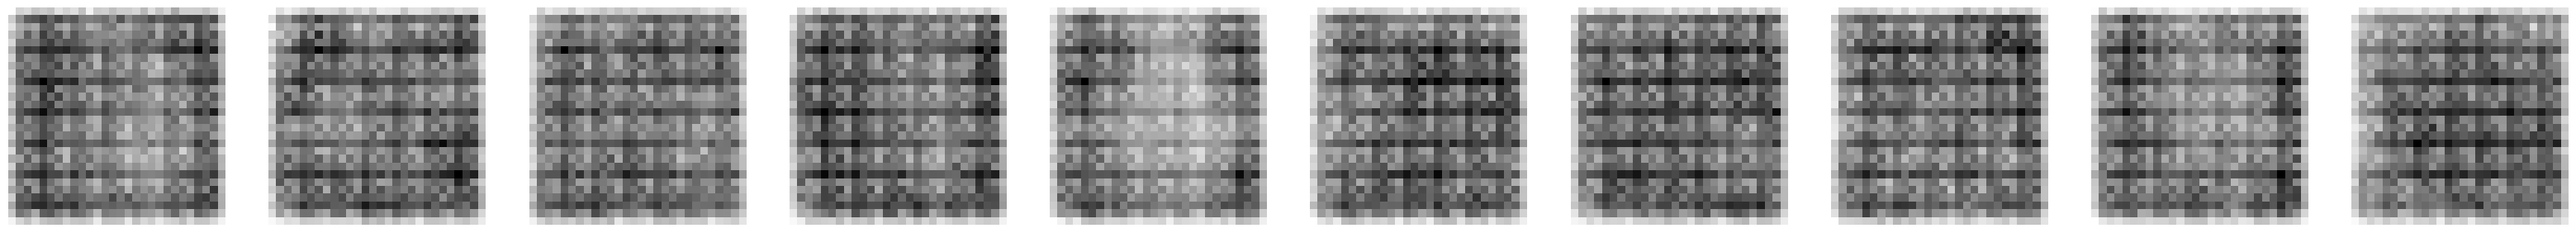

epoch=1
2/2 [==============================] - 0s 15ms/step
epoch=2
2/2 [==============================] - 0s 11ms/step
epoch=3
2/2 [==============================] - 0s 15ms/step
epoch=4
2/2 [==============================] - 0s 22ms/step
epoch=5
2/2 [==============================] - 0s 17ms/step
epoch=6
2/2 [==============================] - 0s 543us/step
epoch=7
2/2 [==============================] - 0s 16ms/step
epoch=8
2/2 [==============================] - 0s 27ms/step
epoch=9
2/2 [==============================] - 0s 29ms/step
epoch=10
2/2 [==============================] - 0s 13ms/step
epoch: 10
1/1 [==============================] - 0s 50ms/step


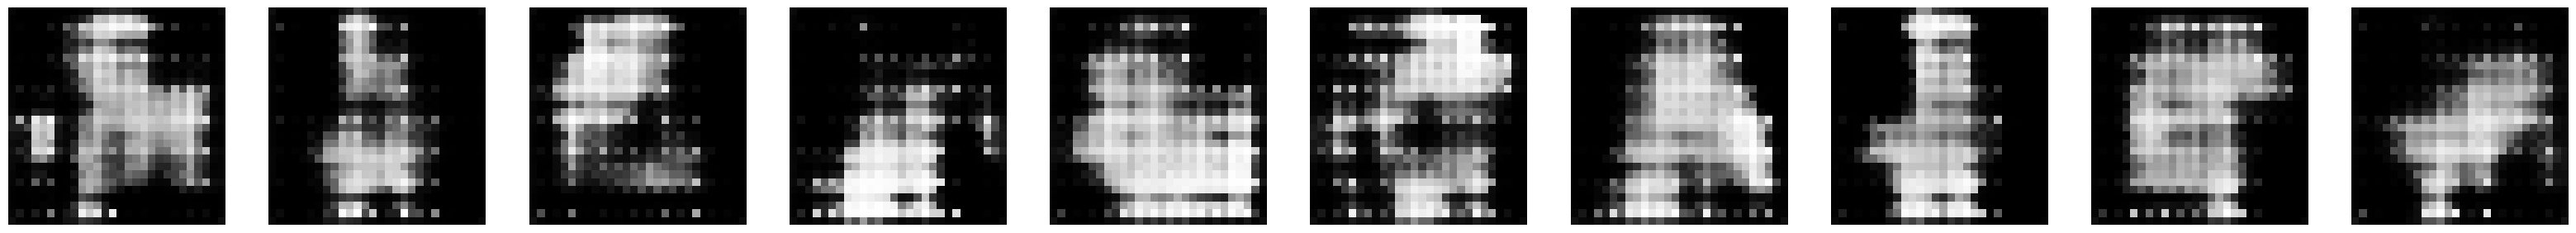

epoch=11
2/2 [==============================] - 0s 21ms/step
epoch=12
2/2 [==============================] - 0s 32ms/step
epoch=13
2/2 [==============================] - 0s 15ms/step
epoch=14
2/2 [==============================] - 0s 14ms/step
epoch=15
2/2 [==============================] - 0s 793us/step
epoch=16
2/2 [==============================] - 0s 17ms/step
epoch=17
2/2 [==============================] - 0s 16ms/step
epoch=18
2/2 [==============================] - 0s 3ms/step
epoch=19
2/2 [==============================] - 0s 15ms/step
epoch=20
2/2 [==============================] - 0s 1ms/step
epoch: 20
1/1 [==============================] - 0s 50ms/step


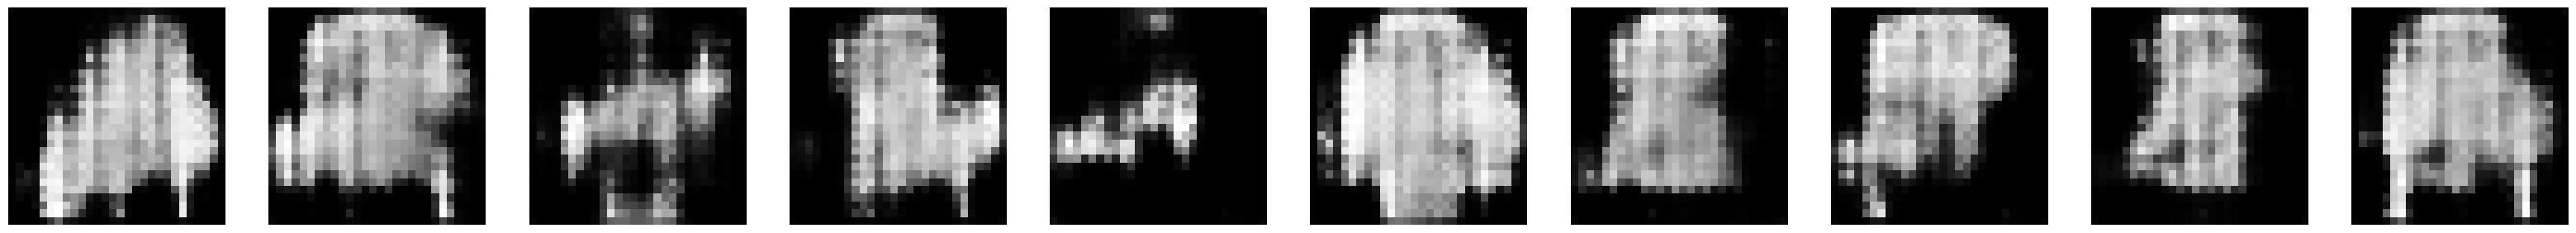

epoch=21
2/2 [==============================] - 0s 17ms/step
epoch=22
2/2 [==============================] - 0s 12ms/step
epoch=23
2/2 [==============================] - 0s 16ms/step
epoch=24
2/2 [==============================] - 0s 15ms/step
epoch=25
2/2 [==============================] - 0s 13ms/step
epoch=26
2/2 [==============================] - 0s 17ms/step
epoch=27
2/2 [==============================] - 0s 1ms/step
epoch=28
2/2 [==============================] - 0s 16ms/step
epoch=29
2/2 [==============================] - 0s 16ms/step
epoch=30
2/2 [==============================] - 0s 7ms/step
epoch: 30
1/1 [==============================] - 0s 44ms/step


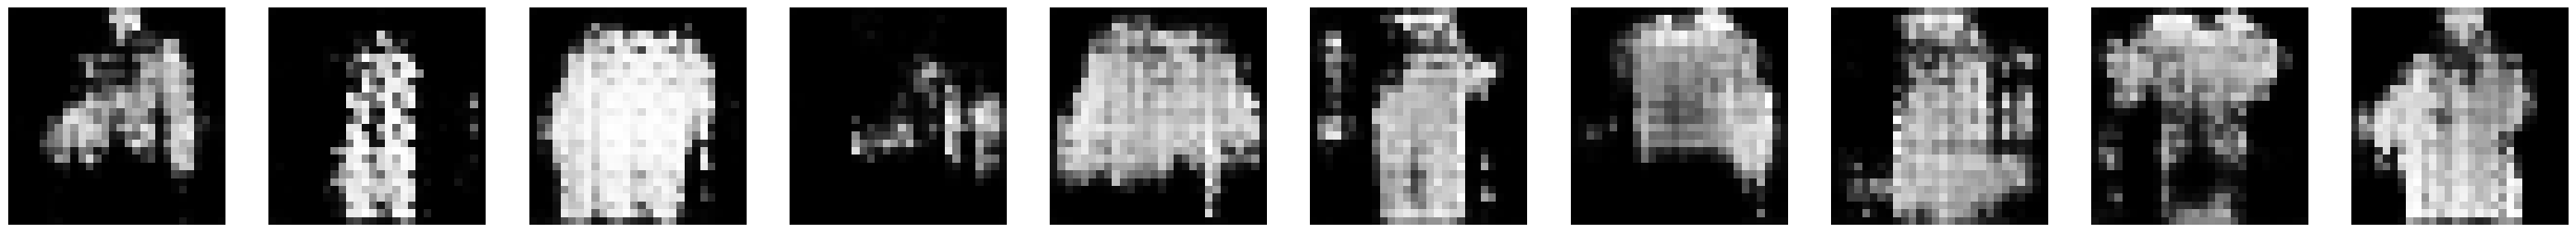

epoch=31
2/2 [==============================] - 0s 12ms/step
epoch=32
2/2 [==============================] - 0s 22ms/step
epoch=33
2/2 [==============================] - 0s 15ms/step
epoch=34
2/2 [==============================] - 0s 18ms/step
epoch=35
2/2 [==============================] - 0s 15ms/step
epoch=36
2/2 [==============================] - 0s 14ms/step
epoch=37
2/2 [==============================] - 0s 16ms/step
epoch=38
2/2 [==============================] - 0s 18ms/step
epoch=39
2/2 [==============================] - 0s 21ms/step
epoch=40
2/2 [==============================] - 0s 16ms/step
epoch: 40
1/1 [==============================] - 0s 47ms/step


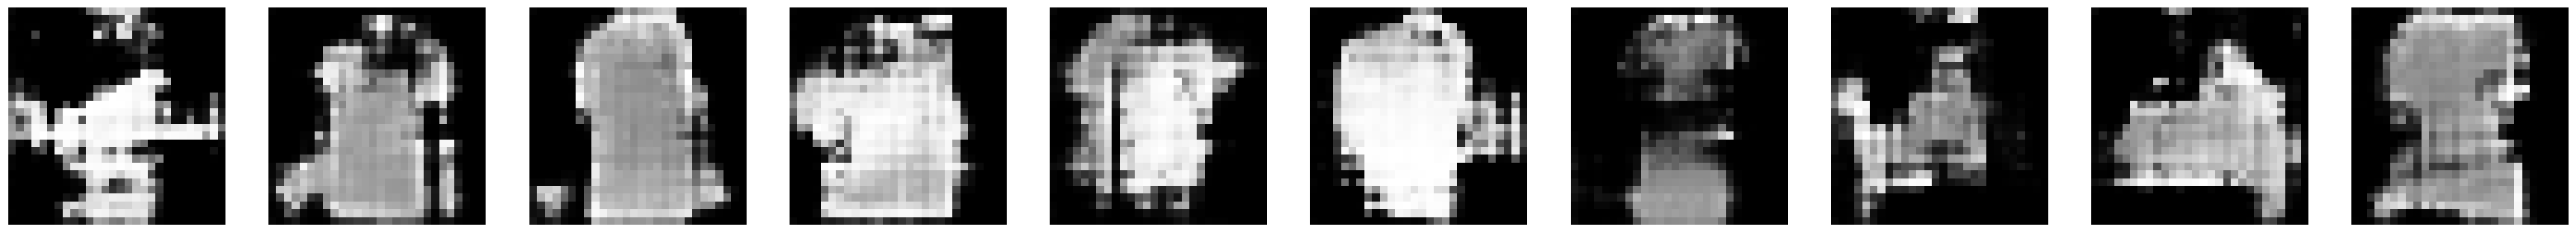

epoch=41
2/2 [==============================] - 0s 9ms/step
epoch=42
2/2 [==============================] - 0s 16ms/step
epoch=43
2/2 [==============================] - 0s 16ms/step
epoch=44
2/2 [==============================] - 0s 15ms/step
epoch=45
2/2 [==============================] - 0s 20ms/step
epoch=46
2/2 [==============================] - 0s 32ms/step
epoch=47
2/2 [==============================] - 0s 15ms/step
epoch=48
2/2 [==============================] - 0s 17ms/step
epoch=49
2/2 [==============================] - 0s 16ms/step
epoch=50
2/2 [==============================] - 0s 5ms/step
epoch: 50
1/1 [==============================] - 0s 34ms/step


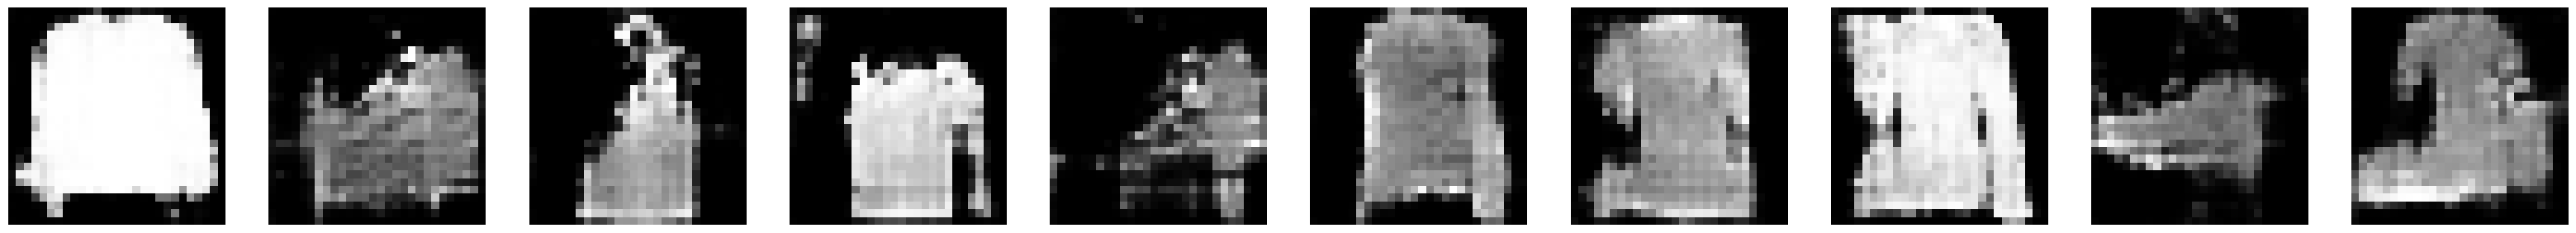

epoch=51
2/2 [==============================] - 0s 17ms/step
epoch=52
2/2 [==============================] - 0s 32ms/step
epoch=53
2/2 [==============================] - 0s 27ms/step
epoch=54
2/2 [==============================] - 0s 17ms/step
epoch=55
2/2 [==============================] - 0s 8ms/step
epoch=56
2/2 [==============================] - 0s 3ms/step
epoch=57
2/2 [==============================] - 0s 23ms/step
epoch=58
2/2 [==============================] - 0s 5ms/step
epoch=59
2/2 [==============================] - 0s 820us/step
epoch=60
2/2 [==============================] - 0s 16ms/step
epoch: 60
1/1 [==============================] - 0s 28ms/step


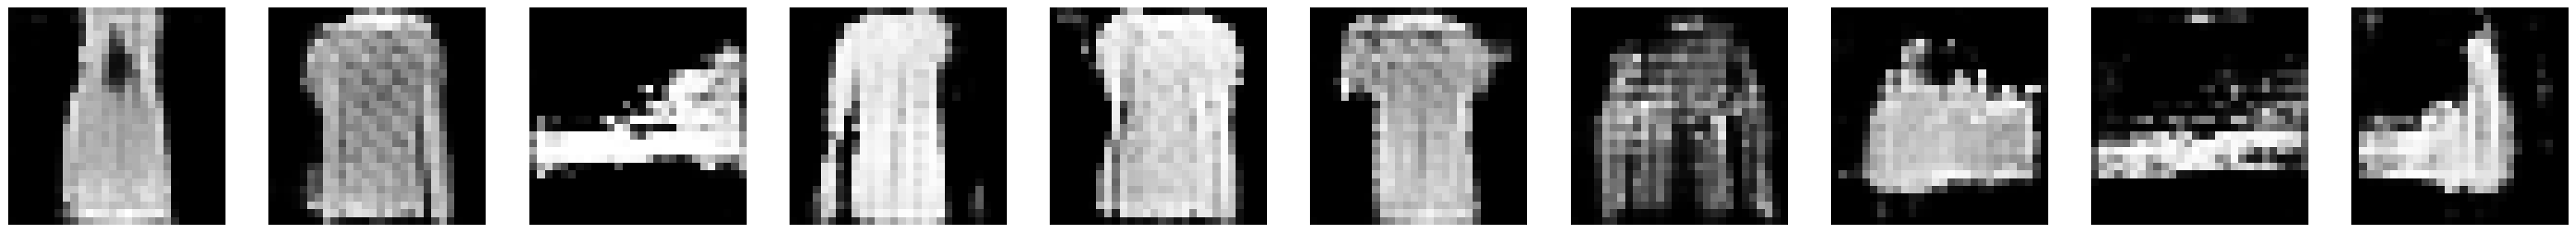

epoch=61
2/2 [==============================] - 0s 19ms/step
epoch=62
2/2 [==============================] - 0s 21ms/step
epoch=63
2/2 [==============================] - 0s 14ms/step
epoch=64
2/2 [==============================] - 0s 23ms/step
epoch=65
2/2 [==============================] - 0s 16ms/step
epoch=66
2/2 [==============================] - 0s 15ms/step
epoch=67
2/2 [==============================] - 0s 22ms/step
epoch=68
2/2 [==============================] - 0s 18ms/step
epoch=69
2/2 [==============================] - 0s 16ms/step
epoch=70
2/2 [==============================] - 0s 16ms/step
epoch: 70
1/1 [==============================] - 0s 50ms/step


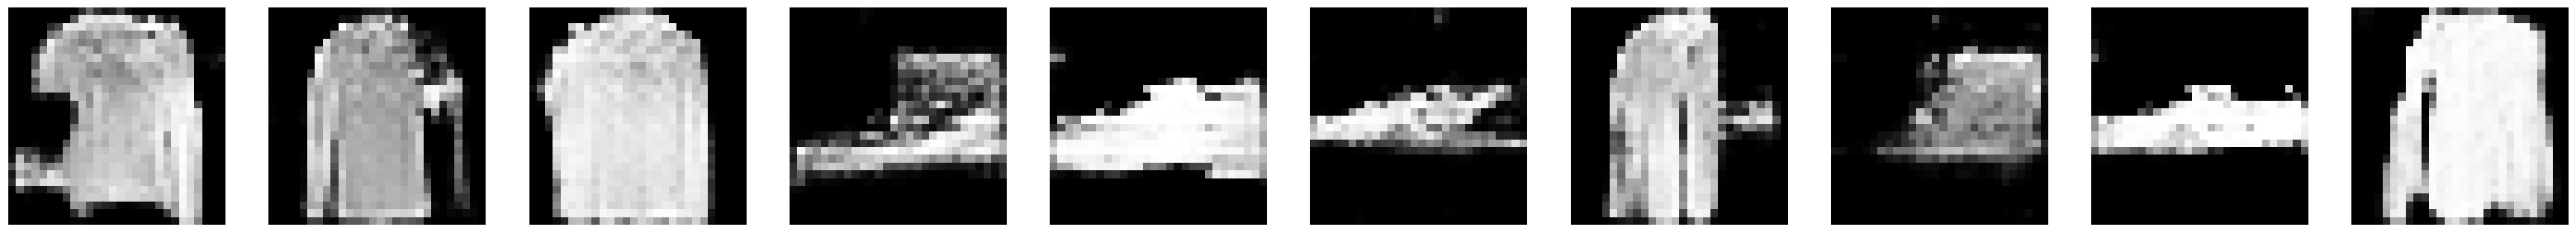

epoch=71
2/2 [==============================] - 0s 32ms/step
epoch=72
2/2 [==============================] - 0s 23ms/step
epoch=73
2/2 [==============================] - 0s 22ms/step
epoch=74
2/2 [==============================] - 0s 20ms/step
epoch=75
2/2 [==============================] - 0s 16ms/step
epoch=76
2/2 [==============================] - 0s 16ms/step
epoch=77
2/2 [==============================] - 0s 4ms/step
epoch=78
2/2 [==============================] - 0s 21ms/step
epoch=79
2/2 [==============================] - 0s 16ms/step
epoch=80
2/2 [==============================] - 0s 16ms/step
epoch: 80
1/1 [==============================] - 0s 47ms/step


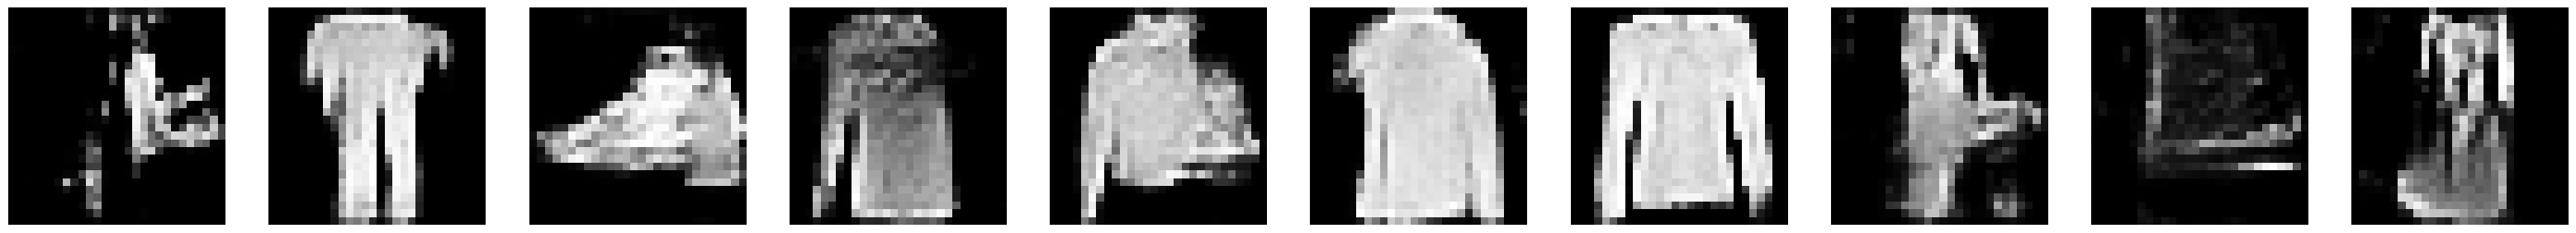

epoch=81
2/2 [==============================] - 0s 16ms/step
epoch=82
2/2 [==============================] - 0s 16ms/step
epoch=83
2/2 [==============================] - 0s 20ms/step
epoch=84
2/2 [==============================] - 0s 17ms/step
epoch=85
2/2 [==============================] - 0s 15ms/step
epoch=86
2/2 [==============================] - 0s 14ms/step
epoch=87
2/2 [==============================] - 0s 17ms/step
epoch=88
2/2 [==============================] - 0s 17ms/step
epoch=89
2/2 [==============================] - 0s 17ms/step
epoch=90
2/2 [==============================] - 0s 16ms/step
epoch: 90
1/1 [==============================] - 0s 38ms/step


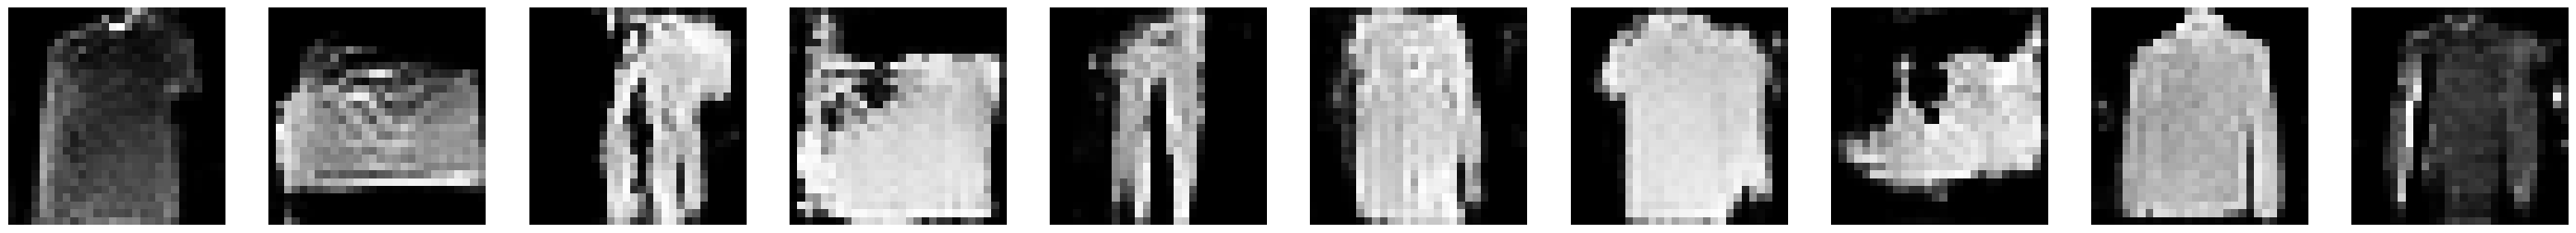

epoch=91
2/2 [==============================] - 0s 16ms/step
epoch=92
2/2 [==============================] - 0s 16ms/step
epoch=93
2/2 [==============================] - 0s 21ms/step
epoch=94
2/2 [==============================] - 0s 31ms/step
epoch=95
2/2 [==============================] - 0s 7ms/step
epoch=96
2/2 [==============================] - 0s 25ms/step
epoch=97
2/2 [==============================] - 0s 31ms/step
epoch=98
2/2 [==============================] - 0s 16ms/step
epoch=99
2/2 [==============================] - 0s 15ms/step
epoch=100
2/2 [==============================] - 0s 16ms/step
epoch: 100
1/1 [==============================] - 0s 38ms/step


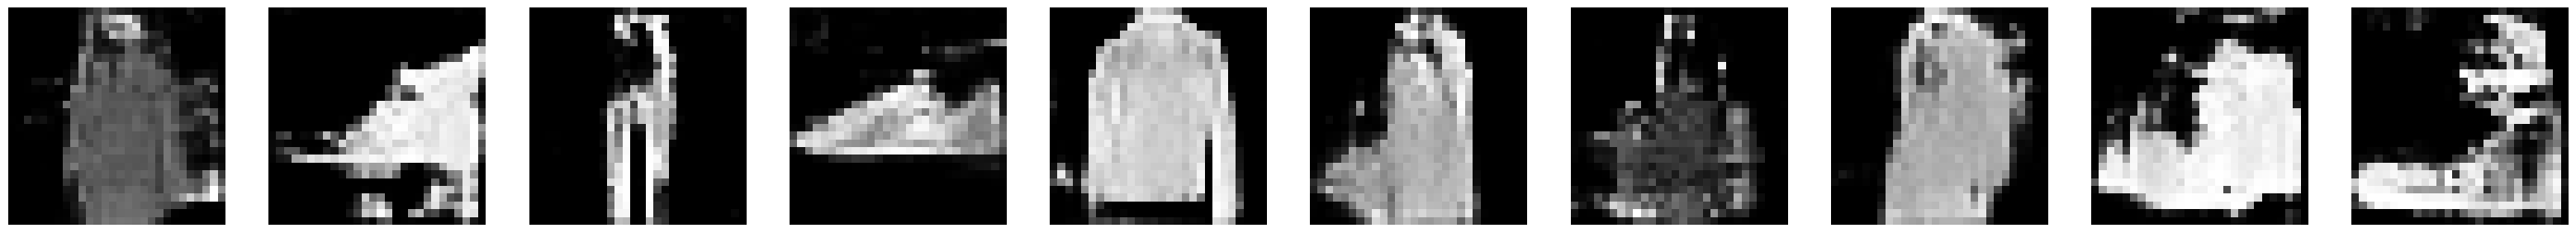

epoch=101
2/2 [==============================] - 0s 17ms/step
epoch=102
2/2 [==============================] - 0s 16ms/step
epoch=103
2/2 [==============================] - 0s 30ms/step
epoch=104
2/2 [==============================] - 0s 4ms/step
epoch=105
2/2 [==============================] - 0s 16ms/step
epoch=106
2/2 [==============================] - 0s 21ms/step
epoch=107
2/2 [==============================] - 0s 16ms/step
epoch=108
2/2 [==============================] - 0s 19ms/step
epoch=109
2/2 [==============================] - 0s 16ms/step
epoch=110
2/2 [==============================] - 0s 16ms/step
epoch: 110
1/1 [==============================] - 0s 39ms/step


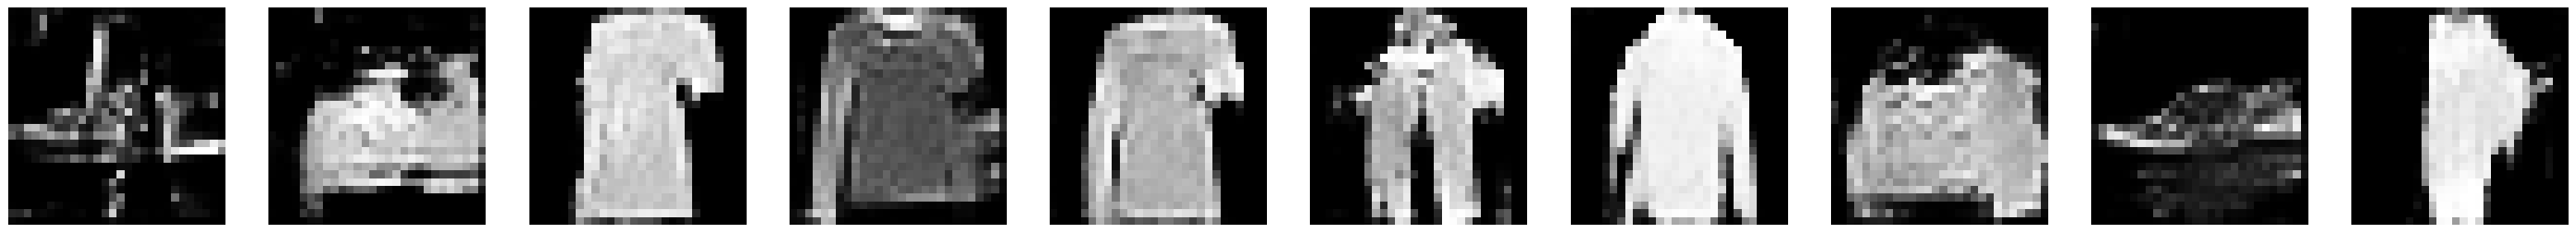

epoch=111
2/2 [==============================] - 0s 31ms/step
epoch=112
2/2 [==============================] - 0s 16ms/step
epoch=113
2/2 [==============================] - 0s 16ms/step
epoch=114
2/2 [==============================] - 0s 22ms/step
epoch=115
2/2 [==============================] - 0s 18ms/step
epoch=116
2/2 [==============================] - 0s 16ms/step
epoch=117
2/2 [==============================] - 0s 15ms/step
epoch=118
2/2 [==============================] - 0s 18ms/step
epoch=119
2/2 [==============================] - 0s 16ms/step
epoch=120
2/2 [==============================] - 0s 21ms/step
epoch: 120
1/1 [==============================] - 0s 40ms/step


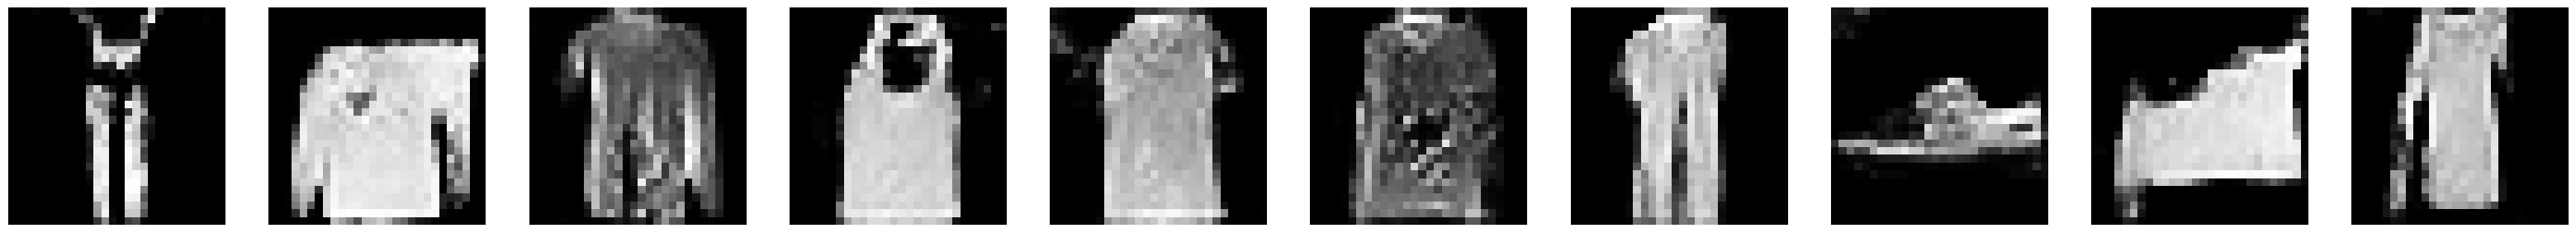

epoch=121
2/2 [==============================] - 0s 16ms/step
epoch=122
2/2 [==============================] - 0s 17ms/step
epoch=123
2/2 [==============================] - 0s 16ms/step
epoch=124
2/2 [==============================] - 0s 16ms/step
epoch=125
2/2 [==============================] - 0s 17ms/step
epoch=126
2/2 [==============================] - 0s 25ms/step
epoch=127
2/2 [==============================] - 0s 16ms/step
epoch=128
2/2 [==============================] - 0s 21ms/step
epoch=129
2/2 [==============================] - 0s 26ms/step
epoch=130
2/2 [==============================] - 0s 16ms/step
epoch: 130
1/1 [==============================] - 0s 47ms/step


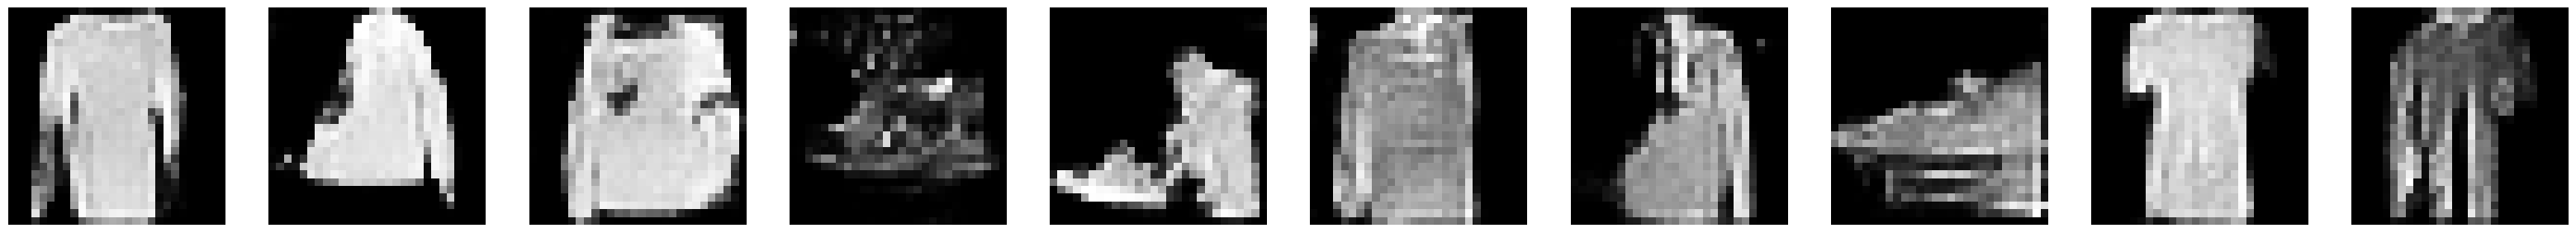

epoch=131
2/2 [==============================] - 0s 10ms/step
epoch=132
2/2 [==============================] - 0s 19ms/step
epoch=133
2/2 [==============================] - 0s 16ms/step
epoch=134
2/2 [==============================] - 0s 28ms/step
epoch=135
2/2 [==============================] - 0s 14ms/step
epoch=136
2/2 [==============================] - 0s 16ms/step
epoch=137
2/2 [==============================] - 0s 16ms/step
epoch=138
2/2 [==============================] - 0s 16ms/step
epoch=139
2/2 [==============================] - 0s 15ms/step
epoch=140
2/2 [==============================] - 0s 23ms/step
epoch: 140
1/1 [==============================] - 0s 47ms/step


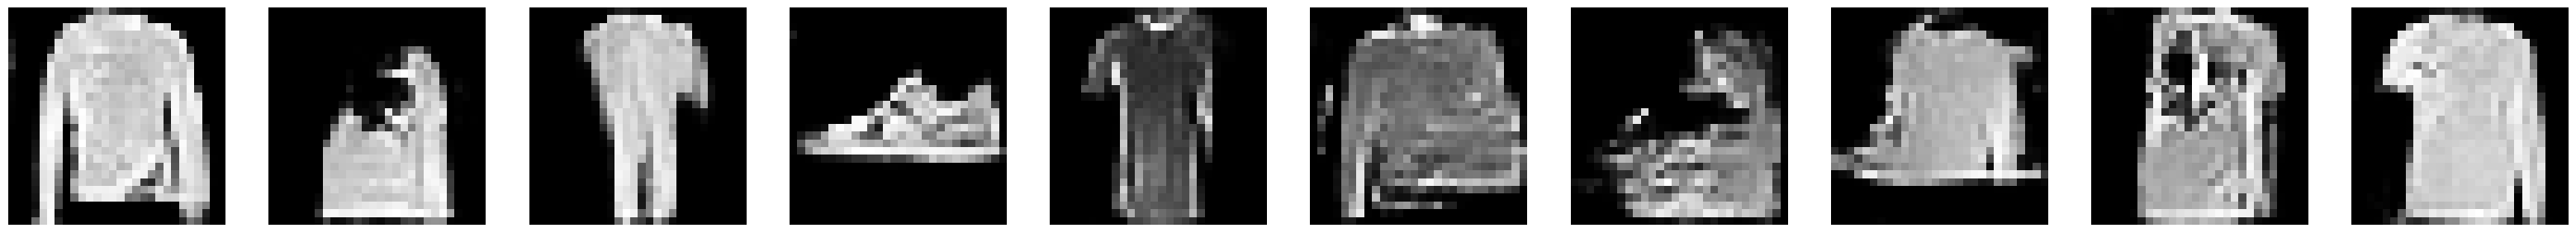

epoch=141
2/2 [==============================] - 0s 16ms/step
epoch=142
2/2 [==============================] - 0s 23ms/step
epoch=143
2/2 [==============================] - 0s 10ms/step
epoch=144
2/2 [==============================] - 0s 20ms/step
epoch=145
2/2 [==============================] - 0s 42ms/step
epoch=146
2/2 [==============================] - 0s 16ms/step
epoch=147
2/2 [==============================] - 0s 17ms/step
epoch=148
2/2 [==============================] - 0s 17ms/step
epoch=149
2/2 [==============================] - 0s 20ms/step
epoch=150
2/2 [==============================] - 0s 18ms/step
epoch: 150
1/1 [==============================] - 0s 40ms/step


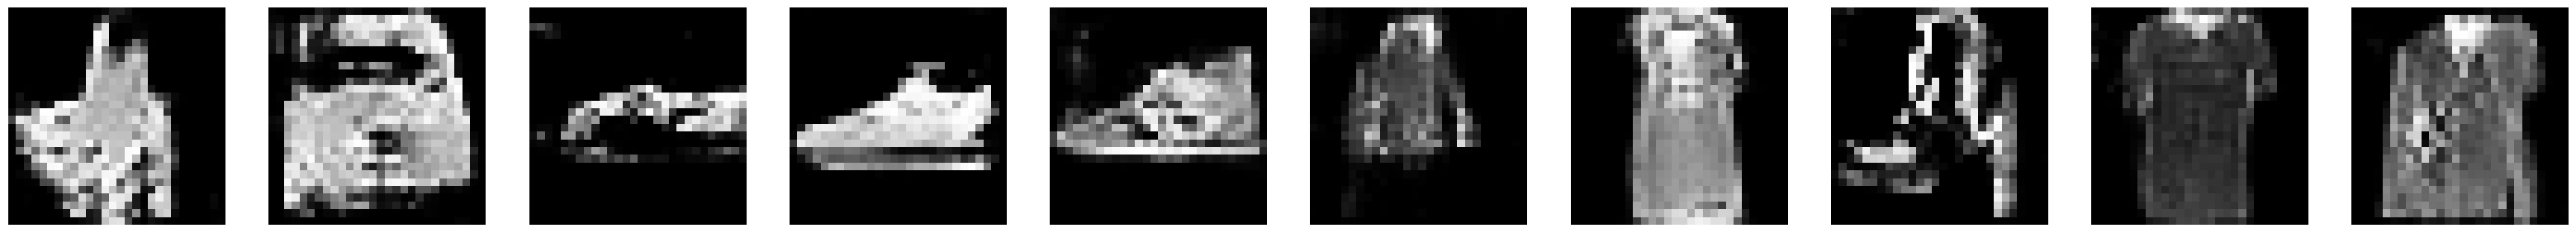

epoch=151
2/2 [==============================] - 0s 16ms/step
epoch=152
2/2 [==============================] - 0s 17ms/step
epoch=153
2/2 [==============================] - 0s 20ms/step
epoch=154
2/2 [==============================] - 0s 15ms/step
epoch=155
2/2 [==============================] - 0s 18ms/step
epoch=156
2/2 [==============================] - 0s 17ms/step
epoch=157
2/2 [==============================] - 0s 6ms/step
epoch=158
2/2 [==============================] - 0s 16ms/step
epoch=159
2/2 [==============================] - 0s 16ms/step
epoch=160
2/2 [==============================] - 0s 16ms/step
epoch: 160
1/1 [==============================] - 0s 40ms/step


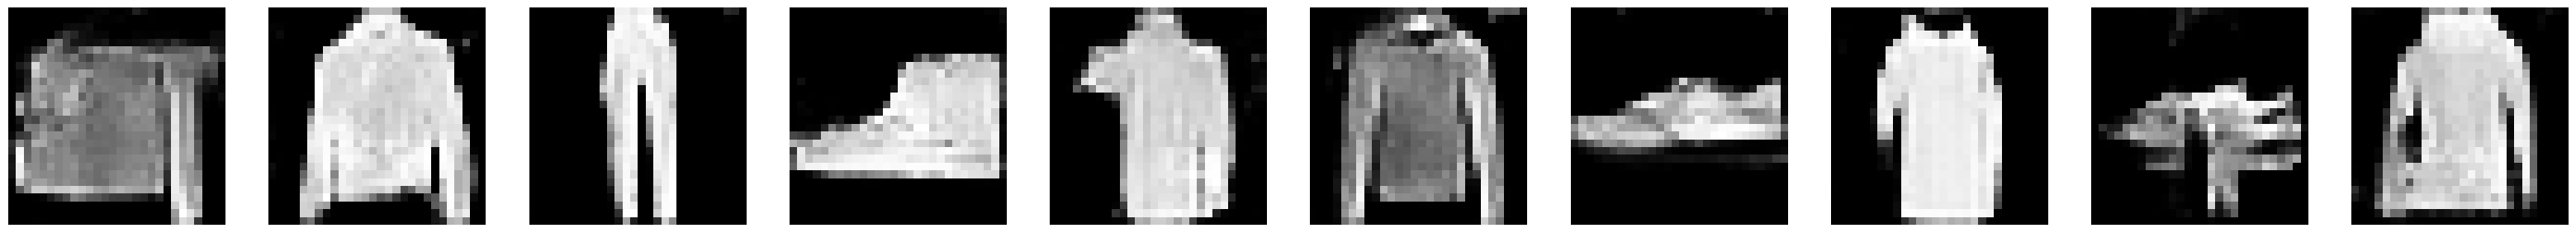

epoch=161
2/2 [==============================] - 0s 4ms/step
epoch=162
2/2 [==============================] - 0s 18ms/step
epoch=163
2/2 [==============================] - 0s 17ms/step
epoch=164
2/2 [==============================] - 0s 17ms/step
epoch=165
2/2 [==============================] - 0s 24ms/step
epoch=166
2/2 [==============================] - 0s 16ms/step
epoch=167
2/2 [==============================] - 0s 22ms/step
epoch=168
2/2 [==============================] - 0s 16ms/step
epoch=169
2/2 [==============================] - 0s 12ms/step
epoch=170
2/2 [==============================] - 0s 9ms/step
epoch: 170
1/1 [==============================] - 0s 45ms/step


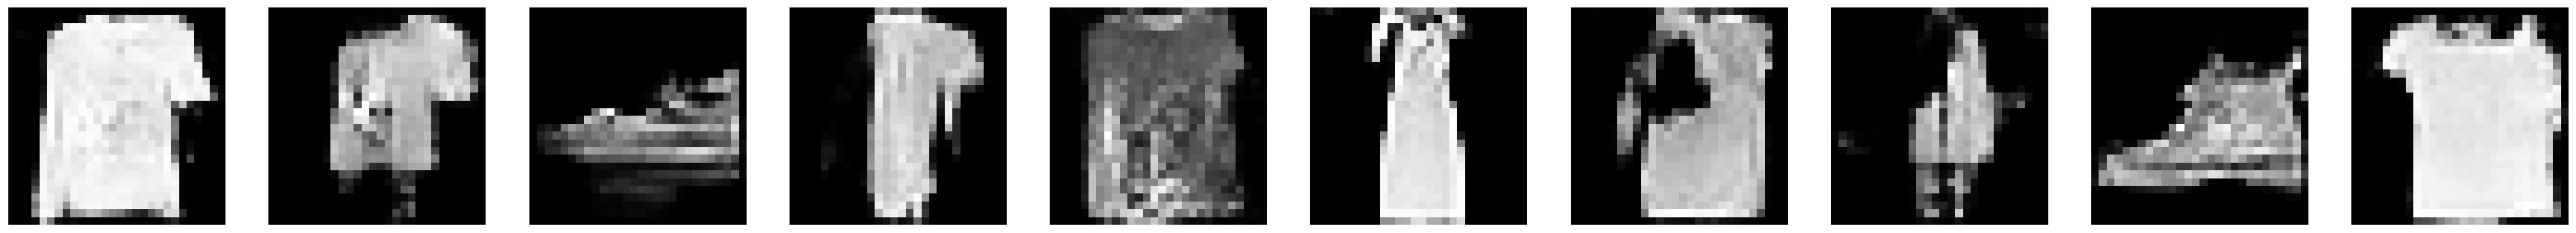

epoch=171
2/2 [==============================] - 0s 20ms/step
epoch=172
2/2 [==============================] - 0s 17ms/step
epoch=173
2/2 [==============================] - 0s 23ms/step
epoch=174
2/2 [==============================] - 0s 19ms/step
epoch=175
2/2 [==============================] - 0s 16ms/step
epoch=176
2/2 [==============================] - 0s 31ms/step
epoch=177
2/2 [==============================] - 0s 14ms/step
epoch=178
2/2 [==============================] - 0s 17ms/step
epoch=179
2/2 [==============================] - 0s 16ms/step
epoch=180
2/2 [==============================] - 0s 17ms/step
epoch: 180
1/1 [==============================] - 0s 38ms/step


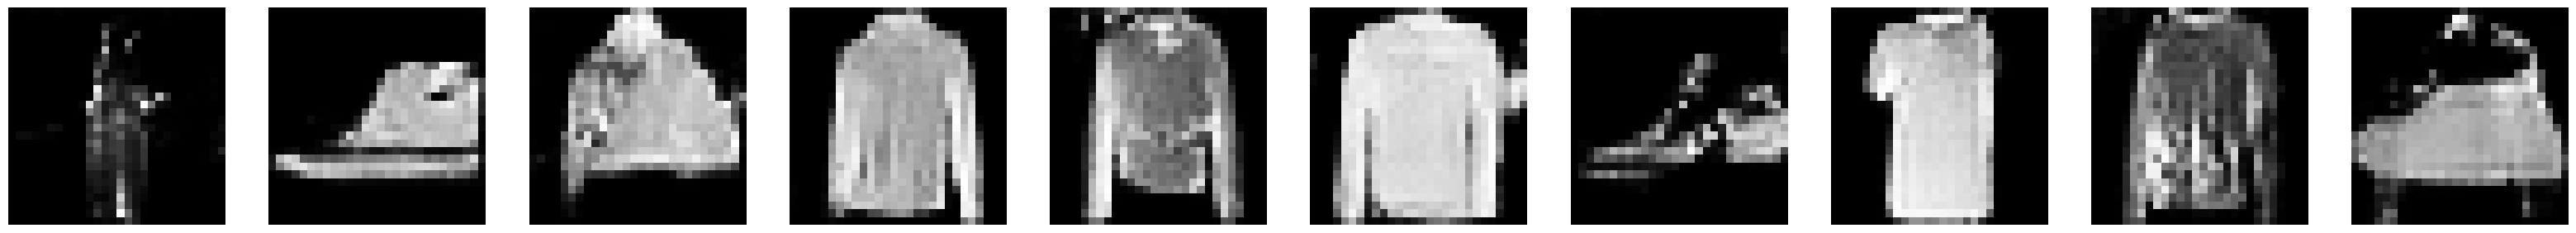

epoch=181
2/2 [==============================] - 0s 19ms/step
epoch=182
2/2 [==============================] - 0s 20ms/step
epoch=183
2/2 [==============================] - 0s 16ms/step
epoch=184
2/2 [==============================] - 0s 21ms/step
epoch=185
2/2 [==============================] - 0s 15ms/step
epoch=186
2/2 [==============================] - 0s 16ms/step
epoch=187
2/2 [==============================] - 0s 21ms/step
epoch=188
2/2 [==============================] - 0s 17ms/step
epoch=189
2/2 [==============================] - 0s 18ms/step
epoch=190
2/2 [==============================] - 0s 16ms/step
epoch: 190
1/1 [==============================] - 0s 41ms/step


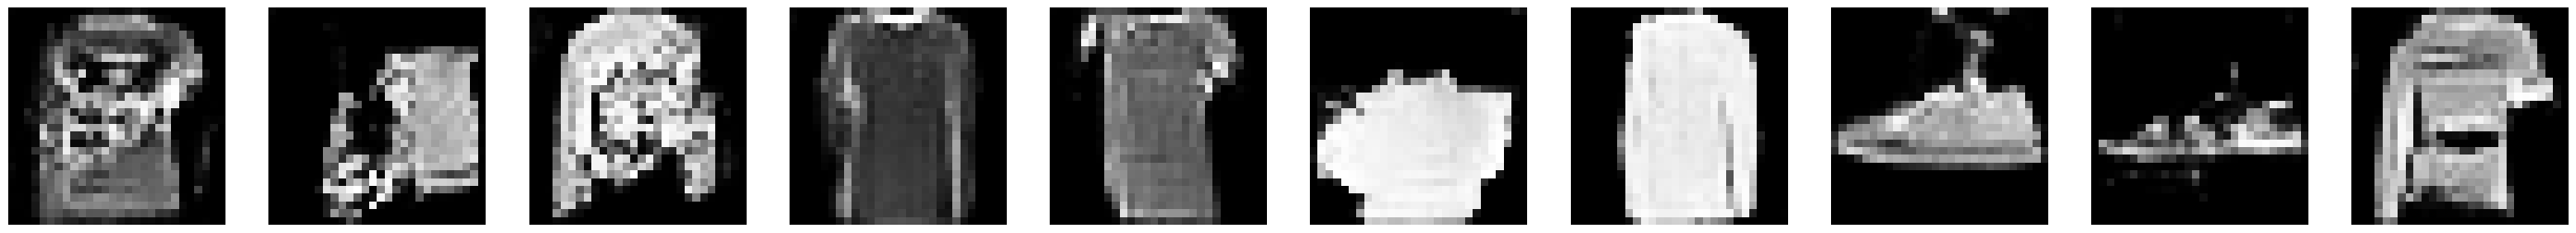

epoch=191
2/2 [==============================] - 0s 15ms/step
epoch=192
2/2 [==============================] - 0s 8ms/step
epoch=193
2/2 [==============================] - 0s 17ms/step
epoch=194
2/2 [==============================] - 0s 18ms/step
epoch=195
2/2 [==============================] - 0s 18ms/step
epoch=196
2/2 [==============================] - 0s 18ms/step
epoch=197
2/2 [==============================] - 0s 19ms/step
epoch=198
2/2 [==============================] - 0s 17ms/step
epoch=199
2/2 [==============================] - 0s 16ms/step


In [21]:
X_train_curr = X_train[::30]
train_gan_model(generator, discriminator, gan, X_train_curr, epochs=200, batch_size=100)

1/1 [==============================] - 0s 39ms/step


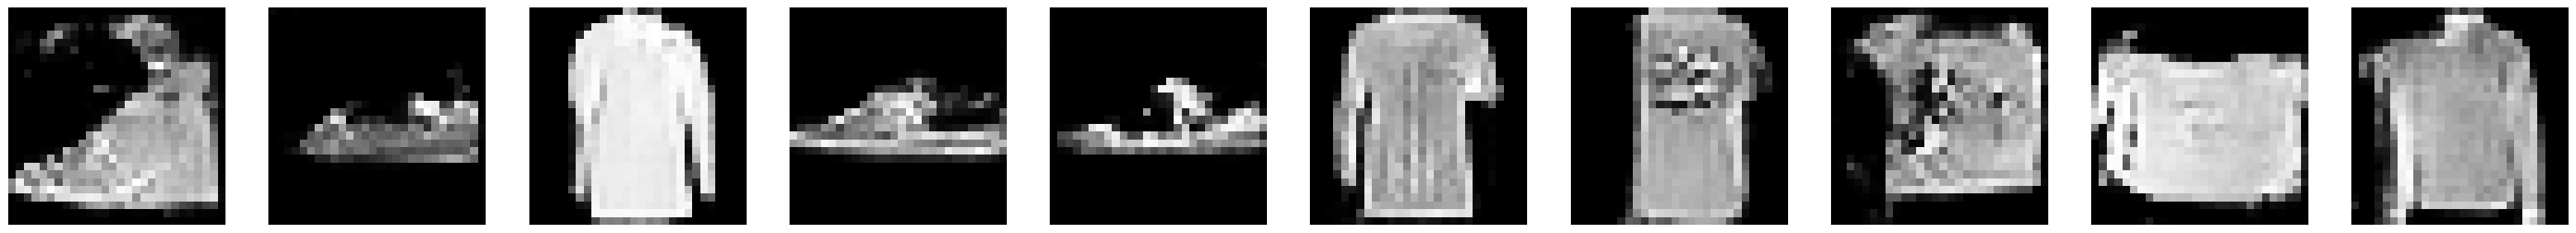

In [22]:
plot_some_images()

In [45]:
ukr_alphabet = 'абвгґдеєжзиіїйклимнопрстуфхцчшщьюя'
tokens = ['[PAD]', '[UNK]', '[START]', '[END]']

In [47]:
file_handler = open('ukr.txt', encoding = 'utf-8')
data = file_handler.readlines()
file_handler.close()

In [51]:
eng = [line[:line.index('\t')].lower() for line in data]
ukr = [line[line.index('\t') + 1:line.index('CC-BY') - 1].lower() for line in data]
eng = [re.sub(f'[^{string.ascii_lowercase + string.digits + string.whitespace}]', '', sent) for sent in eng]
ukr = [re.sub(f'[^{ukr_alphabet + string.digits + string.whitespace}]', '', sent) for sent in ukr]

In [57]:
eng[:5]


['go', 'hi', 'hi', 'hi', 'run']

In [58]:
ukr[:5]

['йди', 'вітаю', 'привіт', 'привіт', 'біжіть']

In [60]:
pairs_eng_ukr = [(eng[i], ukr[i]) for i in range(len(eng))]

In [61]:
random.shuffle(pairs_eng_ukr)
train_pairs = pairs_eng_ukr[:int(0.75*len(pairs_eng_ukr))]
test_valid_pairs = list(set(pairs_eng_ukr) - set(train_pairs))
test_pairs, valid_pairs = test_valid_pairs[:len(test_valid_pairs)//2], test_valid_pairs[len(test_valid_pairs)//2:]

In [62]:
print(f'train set: {len(train_pairs)} pairs')
print(f'test set: {len(test_pairs)} pairs')
print(f'validation set: {len(valid_pairs)} pairs')

train set: 119028 pairs
test set: 19768 pairs
validation set: 19769 pairs


In [63]:
train_eng, train_ukr = [pair[0] for pair in train_pairs], [pair[1] for pair in train_pairs]
test_eng, test_ukr = [pair[0] for pair in test_pairs], [pair[1] for pair in test_pairs]
valid_eng, valid_ukr = [pair[0] for pair in valid_pairs], [pair[1] for pair in valid_pairs]

In [64]:
tf_train_eng = tf.data.Dataset.from_tensor_slices(train_eng).batch(1000).prefetch(2)
tf_train_ukr = tf.data.Dataset.from_tensor_slices(train_ukr).batch(1000).prefetch(2)

In [65]:
eng_vocab = keras_nlp.tokenizers.compute_word_piece_vocabulary(tf_train_eng, 20000, reserved_tokens = tokens)
ukr_vocab = keras_nlp.tokenizers.compute_word_piece_vocabulary(tf_train_ukr, 20000, reserved_tokens = tokens)

NameError: name 'keras_nlp' is not defined